# MATH 189 Project 4
## Group 2, Winter 2021

Members:
- Kasen Teoh
- Chung En Pan
- Nathan Fallahi
- Parsa Ganjooi
- Eamon Jarrett-Mann

# Introduction

University is an extremely challenging time in a student’s career. It is the first time a student will truly experience the “real world”, able to make their own decisions. With materials given to students, it is ultimately up to the student on whether to pursue knowledge. On average, a third of students entering university to pursue a college degree leave without one, and those who do, take about a semester longer than recommended, leading to increased educational fees. Analyzing and identifying health behaviors and patterns in students may be the key to helping students achieve their academic and career goals. Noting behaviors and patterns, such as sleep quality and physical activity may lead to a higher learning achievement rate. In this study, we aim to analyze the causal effect of sleep quality and physical activity on learning goal achievement and whether positive and negative effects mediate these two health behaviors on learning goal achievement. To achieve this analysis, we break the question into smaller parts:

1. Between-person level
    - Does better average sleep quality predicts better average learning goal achievement; higher average physical activity predicts better average learning goal achievement?
    - Does the average positive/negative affect mediate the relation between average sleep quality and average learning goal achievement (e.g., higher average sleep quality predicts higher positive affect which in turn predicts better average learning goal achievement).
    - Does the average positive/negative affect mediate the relation between average physical activity and average learning goal achievement.
    - Prove or disprove using data: students who on average report better learning goal achievement are more likely to pass their examinations. 
2. Within-person level
    - Study connections between higher sleep quality and learning goals achievement on a day-to-day level.
    - Study connections between higher physical and learning goals achievement on a day-to-day level.
    - Prove or disprove using data: daily positive/negative affect mediates the relation between sleep quality and learning goal achievement as well as the relation between physical activity and learning goal achievement (e.g., on days with higher sleep quality, students experience higher positive affect which in turn predicts better learning goal achievement).


# Data

The data for this study were obtained from a prospective, longitude survey. It consists of  82 first year psychology students at the University of Basel in Switzerland. However, out of the 82 students, five students did not take the final exam and another five did not state their final examination score so the samples were dropped to 72. The survey was taken over 46 consecutive days that contained the first 14 days as examination preparation, the next 18 were examination period proper, and the last 14 were the post-examination period. In addition, this particular study aims for the behavior and the learning achievement goal, so the data were only used for the first 32 days. The list and type of the variables are consisted of:
- ID: Categorical
- Day: Discrete
- Sex: Categorical
- Age: Discrete
- Sem (Semester): Categorical
- Sleep Quality: Categorical 
- PhysAct (Physical Activity): Discrete
- Positive Affect: Categorical
- Negative Affect: Categorical
- Learning Goal: Categorical
- Exam Success: Categorical
- Hs_grades (High School grades): Continuous 
- BDI (Beck Depression Index): Categorical


In [18]:
# imports and setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import random
from statsmodels.graphics.gofplots import qqplot_2samples
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

pd.options.display.float_format = "{:,.5f}".format

sns.set()
sns.set_context('talk')

# this might be useful for cleaning the final submission if we have unavoidable warnings
import warnings
warnings.filterwarnings("ignore")


In [19]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [20]:
df = pd.read_csv('Dataset_HealthBehavAcadPerfAffect.tab.tsv', sep='\t', header=0)
df.rename(columns = {'SQ': 'sleep_quality', 'PA': 'positive_affect', 'NA': 'negative_affect', 'LGA': 'learning_goal', 'Exam': 'exam_success', 'HSG': 'hs_grades'}, inplace = True)
#df.loc[:, 'learning_goal'].replace(-99, 0, inplace = True)
df.replace(-99, np.nan, inplace = True)

# Background

There are many factors that influence a student’s academic performance. A major health behavior that affects one’s academic performance is sleep. As noted in a study among medical students, sleep deprivation of varying occasions and durations can substantially impair physical, cognitive, and emotional functions. University students often do their best to stay awake to catch up on school work or study for exams by caffeine, sleep medication, and etc. All of these factors, altering sleeping patterns, degrade the sleep quality one receives throughout the night and ultimately may result in reduced academic achievement (Mirghani et. al, 2015). While merely the duration of the sleep may not directly linking to one’s academic performance, the quality of sleep — which consists of sleep duration, how long it takes to fall asleep, the percent of time spent on bed actually asleep, and etc — is associated with academic performance, i.e students with a better sleep quality achieved more of their academic goals (Lemma et. al, 2014). In another study analyzing the relationship between sleep quality and academic performance, it provides further evidence supporting that sleep disturbance significantly affects medical students’ performance as measured by their GPA (Rasekhi et. al, 1970). 

Another factor we aim to study is the physical activity and whether it has a 
relationship with the student’s academic success. A research study utilizing multiple sources found that physical activity is either positively related to academic performance or that there is not a demonstrated relationship between physical activity and academic performance (Rasberry et. al, 2011). One study conducted on Chinese students found that physical activity level was quite an independent entity that was not related to academic achievement (Yu et. al, 2011). On the other hand, a similar study in young Korean adults suggested that vigorous physical activity was positively correlated with academic performance in the case of boys, and moderate physical activity was positively correlated with academic performance in both boys and girls (So, 2012). 

In Switzerland, students looking to study psychology must pass six mandatory exams in their first year of university. Failing any of these exams restricts students from studying psychology at any Swiss university. The total exam period lasts over a month, and therefore demands consistent effort and dedication for success. In studying survey data collected from first-year psychology students at the University of Basel we can explore potential links between sleep quality, physical activity, and academic performance. Studying these links might reveal what factors that impact academic performance are most important. This will help us find a way to improve academic performance in the future.


# Investigation

## Question 1. Between-person level

### Q1. (a)

In [21]:
s = df.groupby(['ID'])['sleep_quality',"learning_goal"].mean().reset_index(drop = True).set_index('sleep_quality')

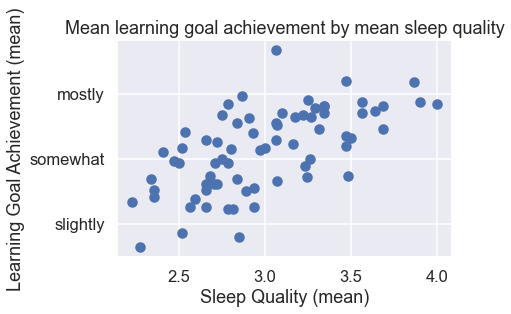

In [22]:
ax = plt.axes() 
plt.scatter(s.index, s.values)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['slightly', 'somewhat','mostly'])
plt.xlabel("Sleep Quality (mean)")
plt.ylabel("Learning Goal Achievement (mean)")
plt.title("Mean learning goal achievement by mean sleep quality")
plt.show()

In [23]:
tdf = df[['sleep_quality', 'learning_goal']].dropna()
corr, p = stats.pearsonr(tdf.sleep_quality, tdf.learning_goal)
print("Pearson correlation: " + str(corr) + "\n" + "P-value: " + str(p))

Pearson correlation: 0.22216472902448836
P-value: 3.2166680855194944e-24


These numerical results along with the graph seem to indicate that sleep quality and learning goal achievement are strongly correlated in a statistically significant manner. Note: arbitrary classification of learning goal achievement was applied to make the graph more easily interpreted. {0 : not at all, 1: slightly, 2: somewhat, 3: mostly, 4: completely}

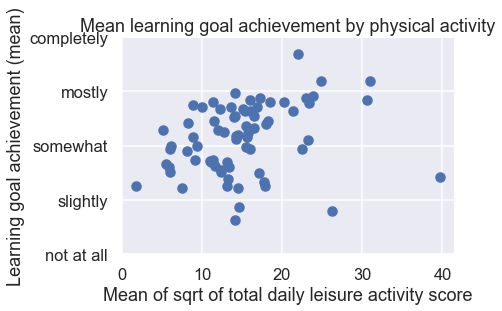

In [24]:
ax = plt.axes()
tdf = df[["ID",'PhysAct', 'learning_goal']]
tdf = tdf.assign(**{'PhysAct' : np.sqrt(df['PhysAct'])} )
s = tdf.groupby(['ID'])['PhysAct',"learning_goal"].mean().reset_index(drop = True).set_index('PhysAct')
plt.scatter(s.index, s.values)
plt.xlabel("Mean of sqrt of total daily leisure activity score")
plt.ylabel("Learning goal achievement (mean)")
ax.set_yticks([0, 1, 2, 3, 4])
ax.set_yticklabels(['not at all','slightly', 'somewhat','mostly','completely'])
plt.title("Mean learning goal achievement by physical activity")
plt.show()

In [25]:
tdf = tdf.dropna()
corr, p = stats.pearsonr(tdf.PhysAct, tdf.learning_goal)
print("Pearson correlation: " + str(corr) + "\n" + "P-value: " + str(p))

Pearson correlation: 0.0773484913087212
P-value: 0.0004606558215917333


These results show that physical activity and learning goal achievement are weakly correlated, and this effect appears to be statistically significant. The graph hints that perhaps there is a 'sweet spot' of physical activity that improves learning goal achievement, but activity beyond this negatively impacts learning goal achievement. Note: arbitrary classification of learning goal achievement was applied to make the graph more easily interpreted. {0 : not at all, 1: slightly, 2: somewhat, 3: mostly, 4: completely}

### Q1. (b)

In [26]:
# import statsmodels.formula.api as smf
# from statsmodels.sandbox.regression.gmm import IV2SLS
tdf = df[['ID','learning_goal','positive_affect', 'sleep_quality', 'negative_affect']].dropna()
tdf = tdf.assign(**{"log_neg": np.log(tdf.negative_affect)})
tdf = tdf.assign(**{"log_pos": np.log(tdf.positive_affect)})
negs = tdf.groupby(['ID'])['log_neg',"sleep_quality", 'learning_goal'].mean().reset_index(drop = True)
pos = tdf.groupby(['ID'])['log_pos',"sleep_quality", 'learning_goal'].mean().reset_index(drop = True)
# first_stage = smf.ols('overall_affect ~ sleep_quality', data = tdf).fit()
# # ivreg = IV2SLS(tdf.learning_goal, np.array(list(zip(tdf.positive_affect,tdf.negative_affect))), tdf.sleep_quality)
# # ivreg
# print("sleep_quality coefficient estimate:, ", first_stage.params["sleep_quality"])
# print("sleep_quality p-value:, ", first_stage.pvalues["sleep_quality"])

In [27]:
tdf = tdf.assign(**{'PhysAct' : np.sqrt(df['PhysAct'])} )

In [28]:
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
outcome_model = sm.OLS.from_formula('learning_goal ~ sleep_quality + log_neg', negs)
mediation_model = sm.OLS.from_formula('sleep_quality ~ log_neg', negs)
med = Mediation(outcome_model, mediation_model, "log_neg", "sleep_quality")
med_result = med.fit(n_rep=100)
l = med_result.summary()
l
#https://nbviewer.jupyter.org/urls/umich.box.com/shared/static/jpmd9y99259u6dv0rj6p46993981m7zm.ipynb

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.45079,-0.68396,-0.20493,0.00000
ACME (treated),-0.45079,-0.68396,-0.20493,0.00000
ADE (control),-0.28360,-0.57977,0.07170,0.20000
ADE (treated),-0.28360,-0.57977,0.07170,0.20000
Total effect,-0.73439,-1.08467,-0.37810,0.00000
Prop. mediated (control),0.58332,0.32065,1.13206,0.00000
Prop. mediated (treated),0.58332,0.32065,1.13206,0.00000
ACME (average),-0.45079,-0.68396,-0.20493,0.00000
ADE (average),-0.28360,-0.57977,0.07170,0.20000
Prop. mediated (average),0.58332,0.32065,1.13206,0.00000


The above are the results of mediation analysis of sleep quality and log of negative affect.

The proportion mediated shows that there is strong evidence for a mediated effect, about 60% the effect can be explained by mediation. Note the confidence intervals are very wide because the data set is relatively small, there are only 72 distinct students.



In [29]:
outcome_model = sm.OLS.from_formula('learning_goal ~ sleep_quality + log_pos', pos)
mediation_model = sm.OLS.from_formula('sleep_quality ~ log_pos', pos)
med = Mediation(outcome_model, mediation_model, "log_pos", "sleep_quality")
med_result = med.fit(n_rep=100)
l = med_result.summary()
l

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.46410,0.23113,0.72157,0.00000
ACME (treated),0.46410,0.23113,0.72157,0.00000
ADE (control),0.63472,0.32501,0.97604,0.02000
ADE (treated),0.63472,0.32501,0.97604,0.02000
Total effect,1.09882,0.72537,1.35409,0.00000
Prop. mediated (control),0.42075,0.21528,0.70304,0.00000
Prop. mediated (treated),0.42075,0.21528,0.70304,0.00000
ACME (average),0.46410,0.23113,0.72157,0.00000
ADE (average),0.63472,0.32501,0.97604,0.02000
Prop. mediated (average),0.42075,0.21528,0.70304,0.00000


The above are the results of mediation analysis of sleep quality and log of negative affect.

The proportion mediated shows that there is evidence for a mediated effect, about 40% the effect can be explained by mediation. Note the confidence intervals are very wide because the data set is relatively small, there are only 72 distinct students.


### Q1. (c)

In [30]:
phys_neg = tdf.groupby(['ID'])['log_neg',"PhysAct", 'learning_goal'].mean().reset_index(drop = True)
phys_pos = tdf.groupby(['ID'])['log_pos',"PhysAct", 'learning_goal'].mean().reset_index(drop = True)
outcome_model = sm.OLS.from_formula('learning_goal ~ PhysAct + log_neg', phys_neg)
mediation_model = sm.OLS.from_formula('PhysAct ~ log_neg', phys_neg)
med = Mediation(outcome_model, mediation_model, "log_neg", "PhysAct")
med_result = med.fit(n_rep=100)
l = med_result.summary()
l

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),-0.07004,-0.25469,0.02683,0.18000
ACME (treated),-0.07004,-0.25469,0.02683,0.18000
ADE (control),-0.67049,-1.04199,-0.32240,0.00000
ADE (treated),-0.67049,-1.04199,-0.32240,0.00000
Total effect,-0.74053,-1.10716,-0.37666,0.00000
Prop. mediated (control),0.07270,-0.03378,0.35710,0.18000
Prop. mediated (treated),0.07270,-0.03378,0.35710,0.18000
ACME (average),-0.07004,-0.25469,0.02683,0.18000
ADE (average),-0.67049,-1.04199,-0.32240,0.00000
Prop. mediated (average),0.07270,-0.03378,0.35710,0.18000


The above are the results of mediation analysis of sleep quality and log of negative affect.

The proportion mediated shows that there is little evidence for a mediated effect, only about 10% of the effect can be explained by mediation. Note the confidence intervals are very wide because the data set is relatively small, there are only 72 distinct students.


In [31]:
outcome_model = sm.OLS.from_formula('learning_goal ~ PhysAct + log_pos', phys_pos)
mediation_model = sm.OLS.from_formula('PhysAct ~ log_pos', phys_pos)
med = Mediation(outcome_model, mediation_model, "log_pos", "PhysAct")
med_result = med.fit(n_rep=100)
l = med_result.summary()
l

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.05339,-0.12261,0.21789,0.48000
ACME (treated),0.05339,-0.12261,0.21789,0.48000
ADE (control),1.04786,0.65641,1.35065,0.00000
ADE (treated),1.04786,0.65641,1.35065,0.00000
Total effect,1.10126,0.77299,1.43079,0.00000
Prop. mediated (control),0.04222,-0.10693,0.22230,0.48000
Prop. mediated (treated),0.04222,-0.10693,0.22230,0.48000
ACME (average),0.05339,-0.12261,0.21789,0.48000
ADE (average),1.04786,0.65641,1.35065,0.00000
Prop. mediated (average),0.04222,-0.10693,0.22230,0.48000


The above are the results of mediation analysis of sleep quality and log of negative affect.

The proportion mediated shows that there is little evidence for a mediated effect, only about 5% the effect can be explained by mediation. Note the confidence intervals are very wide because the data set is relatively small, there are only 72 distinct students. Further, the p-values indicate that the impact is not statistically significant.


### Q1. (d)

To start, let's calculate the correlation between students' average learning goal achievement with their success on examinations. Below, we can see the calculated Pearson's correlation coefficient.

In [32]:
df2 = df.groupby(['ID']).mean()
# plt.scatter(df2['sleep_quality'], df2['exam_success'])
r_lga_exam, pval = stats.pearsonr(df2['learning_goal'].values, df2['exam_success'].values)
print(f'For LGA and exam success, r = : {r_lga_exam}')

For LGA and exam success, r = : 0.3317556149394165


Now, let's setup a test using the following hypotheses and a significance level of 5% (i.e. $\alpha = 0.05$):

- $H_0$: $\rho = 0$
- $H_A$: $\rho \neq 0$

In [33]:
alpha = 0.05
print(f'For p-value of {pval}:')
if pval < alpha:
    print('Reject the null hypothesis')
else: 
    print('Fail to reject the null hypothesis')

For p-value of 0.004415059280023247:
Reject the null hypothesis


As we can see, the $p$-value for our computed correlation has us reject the null hypothesis. Thus, we can prove that students who on average report better learning goal achievement are more likely to pass their examinations.

We can also create a model using logistic regression to predict the likelihood of passing examinations given learning goal achievement.
To create the best possible model from our data, we will run a grid search with cross validation to find the best parameters for a model. Once those parameters are found, we will train that once again on our data and test for accuracy. This process is then repeated 50 times.

In [34]:
# gridsearch to find best classifier
# note: our data set is TINY, so results vary often.

best_test_acc = 0
best_coef = 0
all_test_acc = []
all_coef = []

for i in range(50):
    
    # randomly choose data samples to work with
    X_train, X_test, y_train, y_test = train_test_split(df2['learning_goal'].values.reshape(-1, 1), df2['exam_success'].values)
    
    # parameters to try
    # note: C is inverse of regularization strength
    parameters = {'C':[1e+42, 1e-4, 1e-3, 0.01, 0.1, 1, 10, 1e+2, 1e+3, 1e+4, 1e+5, 1e+6, 1e+7, 1e+8]}

    # run a grid search to find the best value of C
    # note: GridSearchCV uses 5-fold cross validation by default (cv=None)
    # convergence more likely with more iterations run, also takes more time
    # liblinear is good for small datasets
    gridsearch = GridSearchCV(LogisticRegression(max_iter=100, solver='liblinear'), parameters, scoring='accuracy', n_jobs=-1)
    gridsearch.fit(X_train, y_train)
    best_parameters = gridsearch.best_params_

    # train a new classifier on all 5000 training points with selected hyperparameters
    clf = LogisticRegression(max_iter=100,solver='liblinear',C=best_parameters['C']).fit(X_train, y_train)

    # test new classifier and record accuracy
    y_pred = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred)
    y_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    all_test_acc.append(accuracy_score(y_test, y_pred))
    all_coef.append(clf.coef_[0][0])
    
    if (test_accuracy > best_test_acc):
        best_test_acc = test_accuracy
        best_coef = clf.coef_[0][0]
    
    
#     print(f'Trial {i+1} Train Accuracy: {train_accuracy[i]}')
#     print(f'Trial {i+1} Test Accuracy: {test_accuracy[i]}')
#     print(f'Trial {i+1} Coeff: {clf.coef_}')

avg_test_acc = np.mean(all_test_acc)
avg_coef = np.mean(all_coef)

print(f'Best Test Accuracy: {best_test_acc}')
print(f'Best Coefficient: {best_coef}')
print(f'Avg Test Accuracy: {avg_test_acc}')
print(f'Avg Coefficient: {avg_coef}')

Best Test Accuracy: 0.8333333333333334
Best Coefficient: 0.7873738054695067
Avg Test Accuracy: 0.6011111111111112
Avg Coefficient: 1.1195316706803213


From this analysis, we conclude that for every one score increase in average learning goal achievement, the probability of passing all six exams increases by about 0.9.

## Question 2. Within-person level

In [35]:
df.dropna(subset = ['sleep_quality', 'positive_affect', 'negative_affect', 'PhysAct', 'learning_goal'], inplace = True)

### Q2. (a)

In [36]:
#GEE

ind = sm.cov_struct.Exchangeable()
fam = sm.families.Gaussian()

mod = smf.gee('learning_goal ~ sleep_quality', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, total] = res.params #Total affect
[inter, sq_tse] = res.bse
[inter, sq_t_p] = res.pvalues


mod = smf.gee('positive_affect ~ sleep_quality', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, pa_a] = res.params #the 'a' part for positive affect
[inter, sq_paa_se] = res.bse
[inter, sq_paa_p] = res.pvalues


mod = smf.gee('negative_affect ~ sleep_quality', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, na_a] = res.params #the 'a' part for negative affect
[inter, sq_naa_se] = res.bse
[inter, sq_naa_p] = res.pvalues


mod = smf.gee('learning_goal ~ sleep_quality + positive_affect', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, slq, pa_b] = res.params #the 'b' part for positive affect
[inter, temp, sq_pab_se] = res.bse
[inter, temp, sq_pab_p] = res.pvalues


mod = smf.gee('learning_goal ~ sleep_quality + negative_affect', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, slq, na_b] = res.params #the 'b' part for negative affect
[inter, temp, sq_nab_se] = res.bse
[inter, temp, sq_nab_p] = res.pvalues

In [37]:
sq = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect'], index = ['a', 'b', 'a * b (Indirect effect)', 'c\' (Direct effect)', 'c (Total effect)'])
sq.loc['a'] = [pa_a, na_a]
sq.loc['c (Total effect)'] = [total, total]
sq.loc['b'] = [pa_b, na_b]
sq.loc['a * b (Indirect effect)'] = [pa_a * pa_b, na_a * na_b]
sq.loc['c\' (Direct effect)'] = [total - pa_a * pa_b, total - na_a * na_b]

In [38]:
#Linear Mixed Model

mod = smf.mixedlm('learning_goal ~ sleep_quality', df, groups = df['ID'])
res = mod.fit()
[inter, total, var] = res.params #Total affect
[inter, sq_tse, var_se] = res.bse

mod = smf.mixedlm('positive_affect ~ sleep_quality', df, groups = df['ID'])
res = mod.fit()
[inter, pa_a, var] = res.params #the 'a' part for positive affect
[inter, sq_paa_se, var_se] = res.bse


mod = smf.mixedlm('negative_affect ~ sleep_quality', df, groups = df['ID'])
res = mod.fit()
[inter, na_a, var] = res.params #the 'a' part for negative affect
[inter, sq_naa_se, var_se] = res.bse


mod = smf.mixedlm('learning_goal ~ sleep_quality + positive_affect', df, groups = df['ID'])
res = mod.fit()
[inter, slq, pa_b, var] = res.params #the 'b' part for positive affect
[inter, temp, sq_pab_se, var_se] = res.bse


mod = smf.mixedlm('learning_goal ~ sleep_quality + negative_affect', df, groups = df['ID'])
res = mod.fit()
[inter, slq, na_b, var] = res.params #the 'b' part for negative affect
[inter, temp, sq_nab_se, var_se] = res.bse


In [39]:
sq2 = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect'], index = ['a', 'b', 'a * b (Indirect effect)', 'c\' (Direct effect)', 'c (Total effect)'])
sq2.loc['a'] = [pa_a, na_a]
sq2.loc['c (Total effect)'] = [total, total]
sq2.loc['b'] = [pa_b, na_b]
sq2.loc['a * b (Indirect effect)'] = [pa_a * pa_b, na_a * na_b]
sq2.loc['c\' (Direct effect)'] = [total - pa_a * pa_b, total - na_a * na_b]

In [40]:
print('Sleep Quality vs Learning Goal Achievement -- GEE (Left) and Linear Mixed Model (Right)')
multi_table([sq, sq2])

Sleep Quality vs Learning Goal Achievement -- GEE (Left) and Linear Mixed Model (Right)


,Positive Affect,Negative Affect
a,0.21323,-0.23134
b,0.17150,-0.17244
a * b (Indirect effect),0.03657,0.03989
c' (Direct effect),0.06693,0.06361
c (Total effect),0.10350,0.10350
,Positive Affect,Negative Affect
a,0.21350,-0.23223
b,0.17068,-0.17221
a * b (Indirect effect),0.03644,0.03999
c' (Direct effect),0.06535,0.06180


In the two tables above, we have the correlation coefficients from the generalized estimating equations (GEE) model on the left and the linear mixed model on the right. Comparing these two tables, we see that the correlation coefficients are almost identical. This is due to the fact that the default distribution used in a GEE model is Gaussian. Hence to examine the difference, we will test a Poisson distribution below. <br>

In both tables, we see that there is a correlation between learning goal achievement and sleep quality with a correlation of around 0.10179 (the total effect). Additionally, we see that just taking the mediators of positive and negative affect separately, sleeping quality is more associated with positive affect at around 0.214 while with negative affect, there is a negative correlation at around -0.232. Taking the two predictors together, the sleeping quality and the affect, whether postiive or negative, we arrive at a correlation coefficient of around 0.171 and a negative correlation of -0.172. In order to calculate the direct affect sleeping quality has on learning goal achievement, we need to hold the two affects constant. Hence, $\text{direct effect = total effect - indirect effect} = 0.065 \text{  and  } 0.062 $ for positive and negative affect, respectively.

In [41]:
#GEE with Poisson

ind = sm.cov_struct.Exchangeable()
fam = sm.families.Poisson()

mod = smf.gee('learning_goal ~ sleep_quality', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, ttotal] = res.params #Total affect


mod = smf.gee('positive_affect ~ sleep_quality', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, tpa_a] = res.params #the 'a' part for positive affect


mod = smf.gee('negative_affect ~ sleep_quality', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, tna_a] = res.params #the 'a' part for negative affect


mod = smf.gee('learning_goal ~ sleep_quality + positive_affect', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, slq, tpa_b] = res.params #the 'b' part for positive affect


mod = smf.gee('learning_goal ~ sleep_quality + negative_affect', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, slq, tna_b] = res.params #the 'b' part for negative affect

In [42]:
tsq2 = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect'], index = ['a', 'b', 'a * b (Indirect effect)', 'c\' (Direct effect)', 'c (Total effect)'])
tsq2.loc['a'] = [tpa_a, tna_a]
tsq2.loc['c (Total effect)'] = [ttotal, ttotal]
tsq2.loc['b'] = [tpa_b, tna_b]
tsq2.loc['a * b (Indirect effect)'] = [tpa_a * tpa_b, tna_a * tna_b]
tsq2.loc['c\' (Direct effect)'] = [ttotal - tpa_a * tpa_b, ttotal - tna_a * tna_b]

In [43]:
print('Sleep Quality vs Learning Goal Achievement -- GEE with Gaussian (Left) and GEE with Poisson (Right)')
multi_table([sq, tsq2])

Sleep Quality vs Learning Goal Achievement -- GEE with Gaussian (Left) and GEE with Poisson (Right)


,Positive Affect,Negative Affect
a,0.21323,-0.23134
b,0.17150,-0.17244
a * b (Indirect effect),0.03657,0.03989
c' (Direct effect),0.06693,0.06361
c (Total effect),0.10350,0.10350
,Positive Affect,Negative Affect
a,0.05271,-0.08300
b,0.08166,-0.08564
a * b (Indirect effect),0.00430,0.00711
c' (Direct effect),0.04411,0.04130


The two tables above show the differences between using a Gaussain and Poisson Distribution in our study. With the exception of the indirect effect, the GEE model (on the right) which utilizes the Poisson Distribution, results in smaller correlation coefficients than that of the Gaussian Distribution. 

### Q2. (b)

In [44]:
#GEE

ind = sm.cov_struct.Exchangeable()
fam = sm.families.Gaussian()

mod = smf.gee('learning_goal ~ PhysAct', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, total] = res.params #Total affect
[inter, pa_tse] = res.bse
[inter, pa_t_p] = res.pvalues


mod = smf.gee('positive_affect ~ PhysAct ', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, pa_a] = res.params #the 'a' part for positive affect
[inter, pa_paa_se] = res.bse
[inter, pa_paa_p] = res.pvalues


mod = smf.gee('negative_affect ~ PhysAct ', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, na_a] = res.params #the 'a' part for negative affect
[inter, pa_naa_se] = res.bse
[inter, pa_naa_p] = res.pvalues


mod = smf.gee('learning_goal ~ PhysAct + positive_affect', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, pa, pa_b] = res.params #the 'b' part for positive affect
[inter, temp, pa_pab_se] = res.bse
[inter, temp, pa_pab_p] = res.pvalues


mod = smf.gee('learning_goal ~ PhysAct + negative_affect', 'ID', df, cov_struct=ind)#, family=fam)
res = mod.fit()
[inter, pa, na_b] = res.params #the 'b' part for negative affect
[inter, temp, pa_nab_se] = res.bse
[inter, temp, pa_nab_p] = res.pvalues

In [45]:
pa1 = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect'], index = ['a', 'b', 'a * b (Indirect effect)', 'c\' (Direct effect)', 'c (Total effect)'])
pa1.loc['a'] = [pa_a, na_a]
pa1.loc['c (Total effect)'] = [total, total]
pa1.loc['b'] = [pa_b, na_b]
pa1.loc['a * b (Indirect effect)'] = [pa_a * pa_b, na_a * na_b]
pa1.loc['c\' (Direct effect)'] = [total - pa_a * pa_b, total - na_a * na_b]

In [46]:
#Linear Mixed Model

mod = smf.mixedlm('learning_goal ~ PhysAct', df, groups = df['ID'])
res = mod.fit()
[inter, total, var] = res.params #Total affect
[inter, pa_tse, var_se] = res.bse


mod = smf.mixedlm('positive_affect ~ PhysAct ', df, groups = df['ID'])
res = mod.fit()
[inter, pa_a, var] = res.params #the 'a' part for positive affect
[inter, pa_paa_se, var_se] = res.bse


mod = smf.mixedlm('negative_affect ~ PhysAct ', df, groups = df['ID'])
res = mod.fit()
[inter, na_a, var] = res.params #the 'a' part for negative affect
[inter, pa_naa_se, var_se] = res.bse


mod = smf.mixedlm('learning_goal ~ PhysAct + positive_affect', df, groups = df['ID'])
res = mod.fit()
[inter, pa, pa_b, var] = res.params #the 'b' part for positive affect
[inter, temp, pa_pab_se, var_se] = res.bse


mod = smf.mixedlm('learning_goal ~ PhysAct + negative_affect', df, groups = df['ID'])
res = mod.fit()
[inter, pa, na_b, var] = res.params #the 'b' part for negative affect
[inter, temp, pa_nab_se, var_se] = res.bse

In [47]:
pa2 = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect'], index = ['a', 'b', 'a * b (Indirect effect)', 'c\' (Direct effect)', 'c (Total effect)'])
pa2.loc['a'] = [pa_a, na_a]
pa2.loc['c (Total effect)'] = [total, total]
pa2.loc['b'] = [pa_b, na_b]
pa2.loc['a * b (Indirect effect)'] = [pa_a * pa_b, na_a * na_b]
pa2.loc['c\' (Direct effect)'] = [total - pa_a * pa_b, total - na_a * na_b]

In [48]:
print('Physical Activity vs Learning Goal Achievement -- GEE (Left) and Linear Mixed Model (Right)')
multi_table([pa1, pa2])

Physical Activity vs Learning Goal Achievement -- GEE (Left) and Linear Mixed Model (Right)


,Positive Affect,Negative Affect
a,0.00041,-0.00027
b,0.18675,-0.18236
a * b (Indirect effect),0.00008,0.00005
c' (Direct effect),-0.00023,-0.00020
c (Total effect),-0.00015,-0.00015
,Positive Affect,Negative Affect
a,0.00041,-0.00027
b,0.18577,-0.18198
a * b (Indirect effect),0.00008,0.00005
c' (Direct effect),-0.00023,-0.00020


Once again, comparing the two models, GEE and Linear Mixed Models for physical activity and learning goal achievement, the two models arrive at roughly the same numbers for the correlation coefficients. <br>

In the tables above, we see the correlations between learning goal achievement and physical activity. Unlike sleep quality, the correlations between physical activity and learning goal achievement, physical activity and positive and negative affect, and the direct affect physical activity has on learning goal achievement is very close to 0. However, the correlation with both physical activity and positive and negative affect against learning goal achievement is around 0.186 and -0.182 for positive and negative affects, respectively. With the table, we hypothesize that there is no strong connection between physical activity and academic success. 

In [49]:
#GEE with Poisson

ind = sm.cov_struct.Exchangeable()
fam = sm.families.Poisson()

mod = smf.gee('learning_goal ~ PhysAct', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, ttotal] = res.params #Total affect


mod = smf.gee('positive_affect ~ PhysAct', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, tpa_a] = res.params #the 'a' part for positive affect


mod = smf.gee('negative_affect ~ PhysAct', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, tna_a] = res.params #the 'a' part for negative affect


mod = smf.gee('learning_goal ~ PhysAct + positive_affect', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, slq, tpa_b] = res.params #the 'b' part for positive affect


mod = smf.gee('learning_goal ~ PhysAct + negative_affect', 'ID', df, cov_struct=ind, family=fam)
res = mod.fit()
[inter, slq, tna_b] = res.params #the 'b' part for negative affect

In [50]:
pa3 = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect'], index = ['a', 'b', 'a * b (Indirect effect)', 'c\' (Direct effect)', 'c (Total effect)'])
pa3.loc['a'] = [tpa_a, tna_a]
pa3.loc['c (Total effect)'] = [ttotal, ttotal]
pa3.loc['b'] = [tpa_b, tna_b]
pa3.loc['a * b (Indirect effect)'] = [tpa_a * tpa_b, tna_a * tna_b]
pa3.loc['c\' (Direct effect)'] = [ttotal - tpa_a * tpa_b, ttotal - tna_a * tna_b]

In [51]:
print('Sleep Quality vs Learning Goal Achievement -- GEE with Gaussian (Left) and GEE with Poisson (Right)')
multi_table([pa1, pa3])

Sleep Quality vs Learning Goal Achievement -- GEE with Gaussian (Left) and GEE with Poisson (Right)


,Positive Affect,Negative Affect
a,0.00041,-0.00027
b,0.18675,-0.18236
a * b (Indirect effect),0.00008,0.00005
c' (Direct effect),-0.00023,-0.00020
c (Total effect),-0.00015,-0.00015
,Positive Affect,Negative Affect
a,0.00009,-0.00011
b,0.08892,-0.09046
a * b (Indirect effect),0.00001,0.00001
c' (Direct effect),-0.00008,-0.00008


Comparing the GEE models when using the Gaussian (Left) and Poisson (Right) distributions, the coefficients of the Poisson distribution are consistently less than those coming from the Gaussian distribution. When carrying out GEE with a Gaussian Distribution, we result in approximately the same coefficients as the Linear Mixed Model, hence, for the remaining part of the analysos, we will be referring to the GEE with Gaussian distribution. 

### Q2. (c)

### Sobel Test

$$T = \frac{\hat{a}\cdot\hat{b}}{\sqrt{\hat{b}^2SE^2(\hat{a}) + \hat{a}^2SE^2(\hat{b})}}$$

$H_0: \text{There is no indirect effect, i.e: a} \cdot \text{b = 0}$ <br>
$H_A: \text{There is an indirect effect, i.e: a} \cdot \text {b} \ne 0$

In [52]:
def sobel(ab, a, b, se_a, se_b):
    return ab / (math.sqrt(math.pow(b, 2) * math.pow(se_a, 2) + math.pow(a, 2) * math.pow(se_b, 2)))

In [53]:
pd.options.display.float_format = "{:,.3f}".format

critical_value = 1.96


#Sleep quality


ab = sq.loc['a * b (Indirect effect)', 'Positive Affect']
a = sq.loc['a', 'Positive Affect']
b = sq.loc['b', 'Positive Affect']
se_a = sq_paa_se
se_b = sq_pab_se

sqp_T = sobel(ab, a, b, se_a, se_b)

ab = sq.loc['a * b (Indirect effect)', 'Negative Affect']
a = sq.loc['a', 'Negative Affect']
b = sq.loc['b', 'Negative Affect']
se_a = sq_naa_se
se_b = sq_nab_se

sqn_T = sobel(ab, a, b, se_a, se_b)


#Physical Activity

ab = pa1.loc['a * b (Indirect effect)', 'Positive Affect']
a = pa1.loc['a', 'Positive Affect']
b = pa1.loc['b', 'Positive Affect']
se_a = pa_paa_se
se_b = pa_pab_se

pap_T = sobel(ab, a, b, se_a, se_b)

ab = pa1.loc['a * b (Indirect effect)', 'Negative Affect']
a = pa1.loc['a', 'Negative Affect']
b = pa1.loc['b', 'Negative Affect']
se_a = pa_paa_se
se_b = pa_pab_se

pan_T = sobel(ab, a, b, se_a, se_b)

decision = []
for i in [sqp_T, sqn_T, pap_T, pan_T]:
    if i < critical_value:
        decision.append('Fail to reject the null')
    else: 
        decision.append('Reject the null')

st = pd.DataFrame(columns = ['Positive Affect', 'Negative Affect', 'Critical Value', 'Decision (Sleep Quality)', 'Decision (Physical Activity)'], index = ['Sleep Quality', 'Physical Activity'])
st.loc['Sleep Quality'] = [sqp_T, sqn_T, critical_value, decision[0], decision [1]]
st.loc['Physical Activity'] = [pap_T, pan_T, critical_value, decision[2], decision [3]]
st

,Positive Affect,Negative Affect,Critical Value,Decision (Sleep Quality),Decision (Physical Activity)
Sleep Quality,5.143,5.353,1.960,Reject the null,Reject the null
Physical Activity,4.968,3.431,1.960,Reject the null,Reject the null


Above, we see that we are able to reject the null hypothesis because the test statistic is smaller than the critical value of a 95% confidence level. Hence, we have sufficient evidence to reject the null hypothesis in favor of the alternative hypothesis, i.e there is a presence of the mediator (positive and negative affect) when predicting the learning goal outcomes. <br>

However, since the Sobel Test is a more conservative test, meaning that it rejects the null hypothesis more often than it should, we will perform a bootstrap test to confirm our findings. 

### Block Bootstrap

In [101]:
def bootstrap(data):
    num_resample = len(data)
    repetition = 1000
    sleep_pos = np.array([])
    sleep_neg = np.array([])
    physical_pos = np.array([])
    physical_neg = np.array([])
    for i in np.arange(repetition):
        #resample = data.sample(num_resample, replace = True)
        resample = (pd.DataFrame({'ID': np.random.choice(data['ID'], size = len(data['ID'].unique()), replace=True)}).merge(data, how='left'))
        
        ind = sm.cov_struct.Exchangeable()
        fam = sm.families.Gaussian()
        
        #sleep quality
        mod = smf.gee('positive_affect ~ sleep_quality', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, pa_a] = res.params #the 'a' part for positive affect
        [inter, sq_paa_se] = res.bse


        mod = smf.gee('negative_affect ~ sleep_quality', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, na_a] = res.params #the 'a' part for negative affect
        [inter, sq_naa_se] = res.bse


        mod = smf.gee('learning_goal ~ sleep_quality + positive_affect', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, slq, pa_b] = res.params #the 'b' part for positive affect
        [inter, temp, sq_pab_se] = res.bse


        mod = smf.gee('learning_goal ~ sleep_quality + negative_affect', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, slq, na_b] = res.params #the 'b' part for negative affect
        [inter, temp, sq_nab_se] = res.bse
        
        sleep_pos = np.append(sleep_pos, pa_a * pa_b)
        sleep_neg = np.append(sleep_neg, na_a * na_b)
        
        #physical activity
        mod = smf.gee('positive_affect ~ PhysAct ', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, pa_a] = res.params #the 'a' part for positive affect
        [inter, pa_paa_se] = res.bse

        mod = smf.gee('negative_affect ~ PhysAct ', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, na_a] = res.params #the 'a' part for negative affect
        [inter, pa_naa_se] = res.bse


        mod = smf.gee('learning_goal ~ PhysAct + positive_affect', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, pa, pa_b] = res.params #the 'b' part for positive affect
        [inter, temp, pa_pab_se] = res.bse

        mod = smf.gee('learning_goal ~ PhysAct + negative_affect', 'ID', resample, cov_struct=ind)#, family=fam)
        res = mod.fit()
        [inter, pa, na_b] = res.params #the 'b' part for negative affect
        [inter, temp, pa_nab_se] = res.bse
        
        physical_pos = np.append(physical_pos, pa_a * pa_b)
        physical_neg = np.append(physical_neg, na_a * na_b)

    return sleep_pos, sleep_neg, physical_pos, physical_neg


In [22]:
test = bootstrap(df)

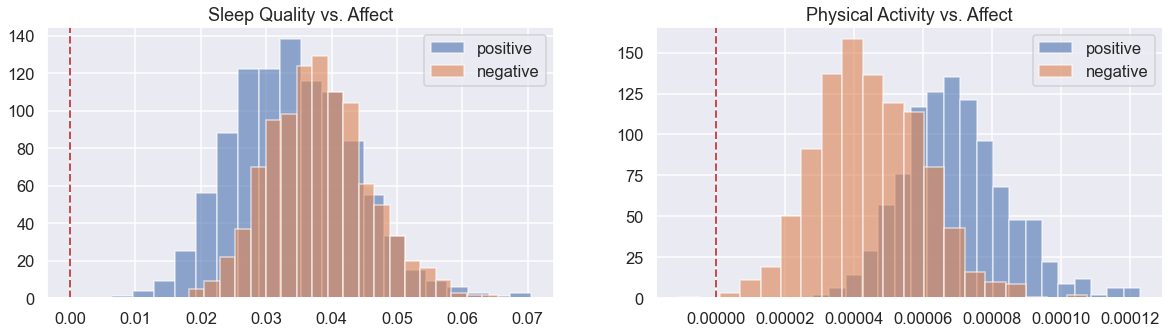

In [23]:
fig, axes = plt.subplots(1,2, figsize = (20,5))

axes[0].set_title('Sleep Quality vs. Affect')
axes[0].hist(test[0], bins = 20, alpha =.6)
axes[0].hist(test[1], bins = 20, alpha =.6)
axes[0].legend(['positive', 'negative'])
axes[0].axvline(0, color='r', linestyle='dashed', linewidth=2)

axes[1].set_title('Physical Activity vs. Affect')
axes[1].hist(test[2], bins = 20, alpha =.6)
axes[1].hist(test[3], bins = 20, alpha =.6)
axes[1].legend(['positive', 'negative'])
axes[1].axvline(0, color='r', linestyle='dashed', linewidth=2)
#sns.histplot(data = test[2], ax = axes[1][0])
#axes[1][0].set_title('Physical Quality Positice effect')
#sns.histplot(data = test[3], ax = axes[1][1])
#axes[1][1].set_title('Physical Quality Negative effect')

plt.show()

In [24]:
temp = list(test)
sp_ci = np.percentile(temp[0], [2.5, 97.5])
sn_ci = np.percentile(temp[1], [2.5, 97.5]) 
pp_ci = np.percentile(temp[2], [2.5, 97.5])
pn_ci = np.percentile(temp[3], [2.5, 97.5])

sp_ci = '(' + str(round(sp_ci[0], 3)) + ', ' + str(round(sp_ci[1], 3)) + ')'
sn_ci = '(' + str(round(sn_ci[0], 3)) + ', ' + str(round(sn_ci[1], 3)) + ')'
pp_ci = '(' + str("{:.5f}".format(float(pp_ci[0]))) + ', ' + str(round(pp_ci[1], 5)) + ')'
pn_ci = '(' + str("{:.6f}".format(float(pn_ci[0]))) + ', ' + str("{:.5f}".format(float(pn_ci[1]))) + ')'

ci = pd.DataFrame(columns = ['Sleep Quality (Positive Affect)', 'Sleep Quality (Negative Affect)', 'Physical Activity (Positive Affect)', 'Physical Activity (Negative Affect)'], index = ['Confidence Interval 95%'])
ci.loc['Confidence Interval 95%', :] = [sp_ci, sn_ci, pp_ci, pn_ci]
ci

,Sleep Quality (Positive Affect),Sleep Quality (Negative Affect),Physical Activity (Positive Affect),Physical Activity (Negative Affect)
Confidence Interval 95%,"(0.018, 0.053)","(0.024, 0.055)","(0.00004, 0.0001)","(0.000018, 0.00008)"


Using a block bootstrap to take into account for the time dependent data, we generated 1000 $\hat{a} \cdot \hat{b}$ and took the 97.5% percentile for a confidence interval with 95% confidence to confirm our results from the Sobel Test. In the two graphs above, we see that all four distributions, positive and negative affect against both sleep quality and physical activity are all positive. Hence, this further supports out findings in the Sobel Test: that there does exists an indirect effect from the mediators, i.e $a \cdot b \ne 0$. <br>

The graphs above also note that the indirect effect from the mediators for the physical activity are much smaller than that of the sleep quality. 

### Statistical Significance

$H_0: \text{a is not independently significant, i.e a = 0}$ <br>
$H_A: \text{a is independently significant, i.e a } \ne 0$ <br>

$H_0: \text{b is not independently significant, i.e b = 0}$ <br>
$H_A: \text{b is independently significant, i.e b } \ne 0$ <br>

$H_0: \text{c is not independently significant, i.e c = 0}$ <br>
$H_A: \text{c is independently significant, i.e c } \ne 0$ <br>

In [54]:
pd.options.display.float_format = "{:,.5f}".format

#Sleep Quality P-Value

alpha = 0.05

decision = []
for i in [sq_paa_p, sq_naa_p, sq_pab_p, sq_nab_p, sq_t_p]:
    if i < alpha / 4:
        decision.append('Reject the null')
    else:
        decision.append('Fail to reject the null')

p = pd.DataFrame(columns = ['Sleep Quality (Positive)', 'Sleep Quality (Negative)', 'alpha', 'alpha /4', 'Decision (Positive)', 'Decision (Negative)'], index = ['a', 'b', 'c'])


p.loc['a'] = [sq_paa_p, sq_naa_p, alpha, alpha / 4, decision[0], decision[1]]
p.loc['b'] = [sq_pab_p, sq_nab_p, alpha, alpha / 4, decision[2], decision[3]]
p.loc['c'] = [sq_t_p, sq_t_p, alpha, alpha / 4, decision[4], decision[4]]
p

,Sleep Quality (Positive),Sleep Quality (Negative),alpha,alpha /4,Decision (Positive),Decision (Negative)
a,0.00014,0.00000,0.05000,0.01250,Reject the null,Reject the null
b,0.00000,0.00000,0.05000,0.01250,Reject the null,Reject the null
c,0.00172,0.00172,0.05000,0.01250,Reject the null,Reject the null


In the table above, we see that we have rejected the null for the indirect and total effect correlations involved in our calculations. Hence, each of these correlations are signficant. This further confirms our findings from the speculating, just looking at the correlation coefficients and the Sobel Test. Because each variable is signficant, this leads us to conclude that a high sleep quality leads to a greater positive affect and a lesser negative affect and both leading to a higher learning goal achievement. Additionally, rejecting the null hypothesis leads us to conclude that positive and negative affect both mediated the correlation between sleep quality and learning goal outcomes.

In [55]:
#Physical Activity P-Value

decision = []
for i in [pa_paa_p, pa_naa_p, pa_pab_p, pa_nab_p, pa_t_p]:
    if i < alpha / 4:
        decision.append('Reject the null')
    else:
        decision.append('Fail to reject the null')

p = pd.DataFrame(columns = ['Physical Activity (Positive)', 'Physical Activity (Negative)', 'alpha', 'alpha /4', 'Decision (Positive)', 'Decision (Negative)'], index = ['a', 'b', 'c'])
alpha = 0.05

p.loc['a'] = [pa_paa_p, pa_naa_p, alpha, alpha / 4, decision[0], decision[1]]
p.loc['b'] = [pa_pab_p, pa_nab_p, alpha, alpha / 4, decision[2], decision[3]]
p.loc['c'] = [pa_t_p, pa_t_p, alpha, alpha / 4, decision[4], decision[4]]
p

,Physical Activity (Positive),Physical Activity (Negative),alpha,alpha /4,Decision (Positive),Decision (Negative)
a,0.00001,0.00197,0.05000,0.01250,Reject the null,Reject the null
b,0.00000,0.00000,0.05000,0.01250,Reject the null,Reject the null
c,0.06931,0.06931,0.05000,0.01250,Fail to reject the null,Fail to reject the null


Contrary to sleep quality, we failed to reject the null hypothsis, i.e the total effect of physical activity in predicting learning goal outcomes is not signficant. However, we were able to conclude that that both positive and negative affects mediated the correlation between physical activity and learning goal achievements (supporting our results from the Sobel Test and block bootstrapping), i.e higher physical activity led to higher positive affects and lower negative affects with higher positive affect leading to higher learning goal achievement and a higher negative activity leading to lower learning goal achievement. 

## Summary and Conclusion

<br>In the within-subject level, taking the Sobel Test, block bootstrap, and the independent significance together, we have concluded that there is in fact an indirect effect that is caused by the mediators, positive and negative affect. Referring back to the bootstrap confidence intervals, each confidence interval does not contain the value 0. However, the relationship between physical activity and learning goal achievement was fairly low and the confidence intervals were extremely close to 0. The hypothesis tests testing for the individual significance displays that the total effect, i.e the correlation between physical activity and learning goal achievement was not significant. However, because the variables between physical activity and the mediators and the mediators to learning goal achievement were significant, we are able to conclude that higher physical activity led to higher positive affect and lower negative affect. Consequently, a higher positive affect leading to higher learning goal achievement and the opposite for negative affect. <br><br> 
Sleep quality, on the other hand, was significant in both mediators and the total effect. Hence, we concluded that a higher sleep quality led to a higher positive affect and a lower negative affect. Ultimately, a higher positive affect and a lower negative affect led to a higher learning goal achievement. 


# Theory

### Pearson’s Correlation Coefficient (r and p value)
We used pearson correlation coefficient which is defined by $r = \frac{cov(X,Y)}{std(X) * std(Y)}$ 
where cov = covariance and std is standard deviation.
This value ranges from -1 to 1 and we use it as it is a good way to measure correlation between variables that have different numerical ranges. 
The p-value that results from is given by a permutation test for the r-value, where the data is shuffled and the resulting r values are tested with a two-tailed hypothesis test. Thus, the p-value is a measure of how unusual the r-value in the data is.


### Scatterplots
Scatterplots show values for two numerical variables of a data set. We can use them for examining the relationship between two variables in question, and ask if they might be correlated. They may also be helpful in viewing the general spread of the data along two variables and seeing if possible clusters exist.


### Mediation Analysis
We used regression to perform mediation analysis, first we regress (linear regression) the outcome (for q b) & 1c) this is learning goal achievement) on the other features (sleep quality & affect for  b), PhysAct & affect for 1c)). Then, we run linear regression on the potential mediated effect (sleep quality on affect for 1b, PhysAct on affect for 1c)), and use the two models to compare the effects of the potential mediating variables. In question 1b) & c), we also constructed 95% confidence intervals and calculated p-values for each of the coefficients.


### Derived Variable Analysis (average response)
In question one we averaged certain features across time periods by individual subjects. This is a form of derived variable analysis, applied in question 1 for determining the impacts and mediation relationships between variables. 
$ \frac{1}{32} \sum_{n=1}^{32} Variable$ for each student, and each variable of interest (PhysAct, Learning goal achievement and affect data)
##### Time-Slopes
$$Y_{ij} = \beta_{i0} + \beta_{i1} \cdot t_{j} + \mathcal{E}_{ij}$$
$$\begin{bmatrix}
Y_{i1} \\ 
\vdots \\
Y_{in} \end{bmatrix} =  \beta_{i0} + \beta_{i1} \cdot 
\begin{bmatrix} 
t_1 \\ 
\vdots \\ 
t_n \end{bmatrix} + 
\begin{bmatrix} 
\mathcal{E}_{i1} \\ 
\vdots \\ 
\mathcal{E}_{in} \end{bmatrix}$$
where $\begin{bmatrix} 
t_1 \\ 
\vdots \\ 
t_n \end{bmatrix}$ are the time observations


### Sobel Test
<center>$H_0: a \cdot b = 0$ <br>
$H_A: a \cdot b \ne 0$ <br>
$\text{Sobel Test: } T = \frac{\hat{a}\cdot\hat{b}}{\sqrt{\hat{b}^2SE^2(\hat{a}) + \hat{a}^2SE^2(\hat{b})}} \text{~ N(0, 1)}$<br><br></center>
In order to test whether the indirect effect is present or absent in this study, we use a Sobel Test. While there are other ways to test for the presence or absence, for instance, testing a and b and their test statistics independently to see if they are equal to 0. However, testing independently assumes that the two variables are independent. In our study, the variables a and b originate from the same data, with the same predictor, mediator, and outcome variable, hence, the two variables that compose the indirect effect are not independent. <br><br>
To calculate the Sobel Test statistic, we obtain two estimators for the variables a and b and their standard errors. In the denominator of the test statistic formula, we cross multiply the estimators with their standard errors squared because the data is dependent on each other and the standard errors are squared because it is an estimator of the variance. Using a 95% confidence level, we reject the null if the test statistic is greater than 1.96, the critical value of a 95% confidence level, i.e if the test statistic is greater than 1.96, then we have sufficient evidence that there is an indirect effect and the mediator variable does influence the outcome and vice versa.  <br><br>
While the Sobel Test is useful in detecting the presence of the indirect effect from the mediator variable, the Sobel Test is more conservative, meaning that it rejects the null hypothesis more often than it should, leading to a small probability of a type I error (rejecting the null when we do not have sufficient evidence) and a larger type II error (not rejecting the null when we do have sufficient evidence). A large probability of a type II error leads to a small power (a low probability of correctly rejecting the null when the null is false). Because the Sobel Test is a very conservative test, we also implement the use of a Bootstrap test to see the true value of the indirect effect. 


### Hypothesis Testing
Hypothesis tests typically have two hypotheses: a null and an alternative hypothesis. The null hypothesis answers yes to the topic in question while the alternative hypothesis says the opposite. Usually, with hypothesis tests, we test at the 95% confidence level and an $\alpha$ of 5%, although it is not required to use these levels. In our case study, we can utilize hypothesis tests to test for the significance of coefficients, i.e whether they were equal to 0 or not. <br><br>
In the event that the calculated p-value for the test statistic is less than the $\alpha$ or if the test statistic is greater than the critical value (1.96 for a 95% confidence level), then we are able to reject the null hypothesis in favor of the alternative hypothesis because we have sufficient evidence that the alternative hypothesis is true. On the other hand, when the p-value is greater than the $\alpha$ level or the test statistic is less than the critical value, we fail to reject the null hypothesis because we do not have sufficient evidence to prove that the alternative hypothesis is correct. <br><br>
When rejecting or failing to reject the null hypothesis, there are errors involved with the decision process. A type I error is described as when we have rejected the null hypothesis when we did not have sufficient evidence to reject it. The probability of a type I error occurring is equal to that of the $\alpha$ level. A type II error is described as when we have failed to reject the null hypothesis when the alternative hypothesis was true. The probability of a type II error occurring is equal to $\beta$. Lastly, power describes the ability to correctly reject the null hypothesis when the alternative hypothesis is actually true and it is calculated as 1 - beta (the probability of a type II error occurring). Typically, as $\alpha$ grows larger, $\beta$ grows smaller and power increases as well and vice versa. <br><br>
For instance, the Sobel Test is more conserivative leading to a lower probability of type I error, higher probability of type II error, and a lower power, i.e the probability of correctly rejecting the null hypothesis when the alternative hypothesis is true is low. 


### Block Bootstrap
To confirm our results from the Sobel Test, we resample our data and calculate many $\hat{a} \cdot \hat{b}$ (indirect effect coefficients). However, because our data is longitudinal, i.e dependent due to 32 observations coming from a single subject, we are unable to perform a regular bootstrap resample method. Hence, we perform a block bootstrap. Because the purposes of resampling data is to essentially perform the experiment again. Our original data was sampled by taking 72 individuals and having the 72 subjects fill out a survey for 32 consecutive days. The block bootstrapping method is valid for our data because we are randomly selecting 72 participants with replacement and taking all the 32 observations from each participant. Block bootstrapping takes into consideration longitudinal data because we are randomly selecting the participants and taking all of their observations instead of simply randomly selecting observations. For instance, if we had randomly selected participant 1, we would extract all 32 measurements made from participant 1. We randomly selected 72 times to mimic that of the original study. We performed the block bootstrap 1000 times, resulting in 1000 $\hat{a} \cdot \hat{b}$ coefficients. We then proceeded to take the 97.5 percentile to calculate a confidence interval at the 95% confidence level to see whether the value of 0 is plausible.  


### Linear Mixed Models
##### Within-subjects model
$$Y_{ij} = \beta _{i, 0} + \beta _{i, 1} \cdot X_{ij} + \mathcal{E}_{ij}$$
where $i$ are the individuals, $j$ is the time, $X_{ij}$ are the covariates and $\mathcal{E}_{ij}$ are the model errors
##### Between-subjects model
$$
Y_{ij} = \beta_{i,0} + \beta_{i,1} X_{ij} + \mathcal{E}_{ij}
$$
where $Y_{ij}$ denote the outcome for subject $i$ in the $j$-th measurement, $X_{ij}$ denote the covariates for subject $i$ in the $j$-th measurement, and $\mathcal{E}_{ij}\sim N(0,\sigma^2)$ are the error terms. <br><br>
For between-subjects model, we assume
$$
\left[\begin{matrix}
\beta_{i,0}\\
\beta_{i,1}
\end{matrix}\right]
\sim N\left(\left[\begin{matrix}
\beta_{0}\\
\beta_{1}
\end{matrix}\right], \left[\begin{matrix}
D_{00}& D_{01}\\
D_{10} & D_{11}\\
\end{matrix}\right] \right),
$$
where $\beta_0, \beta_1, D_{00}, D_{01}, D_{10}, D_{11}$ are fixed parameters. <br><br>
Equivalently, we can write the model as
$$
Y_{ij} = \beta_{0} + \beta_{1} X_{ij} + b_{i,0} + b_{i,1} X_{ij}+\mathcal{E}_{ij},
$$
where 
$$
\left[\begin{matrix}
b_{i,0}\\
b_{i,1}
\end{matrix}\right]
\sim N\left(\left[\begin{matrix}
0\\
0
\end{matrix}\right], \left[\begin{matrix}
D_{00}& D_{01}\\
D_{10} & D_{11}\\
\end{matrix}\right] \right),
$$
<center>  $\mathcal{E}_{ij} \sim_{i.i.d} N(0,\sigma^2)$ <br> $Y_{ij} + \beta_0 + \beta_1 \cdot X_{ij}$ is the fixed effects, <br> $b_{i, 0} + b_{i, 1} \cdot X_{ij}$ is the random effects between subjects, <br>and $\mathcal{E}_{ij}$ is within-subject. <br><br>
$$E \left [ b_{i, 0} \right ] = 0 \text{ and } E \left [ b_{i, 1} \right ] = 0$$
$$var(b_{i, 0}) = D_{00} \text{ and } var(b_{i, 1}) = D_{11} \text{ and } cov(b_{i, 0}, b_{i, 1}) = D_{01}$$ </center>


##### Covariance Matrices
D-variance covariance matrix $\in \mathbb{R}^{2 x 2} $ <br><br>
$$\mathcal{E}_i = \begin {bmatrix}
\mathcal{E_{i1}} \\
\vdots \\
\mathcal{E_{in_i}} \\
\end {bmatrix} 
\sim N_{n_i} \left( 
\begin {bmatrix}
0 \\
\vdots \\
0 \\
\end {bmatrix}, 
\sum_i\right) 
$$ 
$$
\mathcal{X}_i = \begin {bmatrix}
\mathcal{X}_{i1}^T \\
\vdots \\
\mathcal{X}_{in_i}^T \\
\end {bmatrix} \in \mathbb{R}^{n_i x p} ~~~
\mathcal{Z}_i = \begin {bmatrix}
\mathcal{Z}_{i1}^T \\
\vdots \\
\mathcal{Z}_{in_i}^T \\
\end {bmatrix} \in \mathbb{R}^{n_i x 2} ~~~
\mathcal{Y}_i = \begin {bmatrix}
\mathcal{Y}_{i1} \\
\vdots \\
\mathcal{Y}_{in_i} \\
\end {bmatrix} \in \mathbb{R}^{n_i}
$$

##### Residuals
Population Residuals:
$$R_{ij}^p = Y_{ij} - X_{ij}^T \cdot \hat{\beta}$$
$$E \left [ Y_{ij} | X_{ij} \right ]$$
Within-Subject Residuals:
$$R_{ij}^w = Y_{ij} - X_{ij}^T \cdot \hat{\beta} - X_{ij}^T \cdot \hat{b_{ij}} = R_{ij}^p - Z_{ij}^T \cdot \hat{b_{ij}}$$
If the model is true for the within-subject level, then $\mathcal{E}$ is independence, has the same variance for every $i, j \rightarrow var \left( \mathcal{E}_{ij} \right ) = \sigma^2$, and a normal distribution. 


### Generalized Estimating Equations (GEE)
When using Generalized Estimating Equations (GEE), there are two models that can be used: a regression model for the mean responses and with a correlation model specified for the within-subjects. A GEE is useful because it is more robust than Linear Mixed Equations. Using GEE, we are able to estimate $\hat{\beta}$ with $\hat{\beta}$ being close to the true value of $\beta$ regardless of the correlation model (with $\beta$ being the fixed effects). Additionally, in a GEE model, the standard errors are valid even though the correlation model is wrong. 
##### Logistic Regression Model
Mean response $\mu_{ij} = E\left[Y_{ij} | X_{ij} \right]$ where $\mu_{ij}$ is the marginal mean. <br><br>
Because we utilized the logistic model in predicting the pass/fail outcome of a student, we used a binary logistic model. <br>
$$\text{logit} \left [ P \left [ Y_{ij} = 1 | X_{ij} \right ] \right ] = X_{ij}^T \beta $$
$$P \left [ Y_{ij} = 1 | X_{ij} \right ] = \text{logit}^{-1}(X_{ij}^T \beta)$$
$$\text {logit}(p) = log\left ( \frac{p}{1 - p} \right ) = - log\left (\frac{1}{p} - 1 \right )$$
$$\text{logit} ^{-1}(a) = \text{logistic}(a) = \frac{1}{1 + e^{-a}} = \frac{e^a}{e^a + 1}$$<br>
Because we the outcome variables are either pass or fail, it is classified as a binary outcome, hence: 
$$P \left [ Y_{ij} | X_{ij} \right] = \mu_{ij}$$
$$\text{logit}(\mu_{ij}) = X_{ij}^T \beta$$<br>
with $\mu_{ij}$ not depending on anything other than $X_{ij}$
<br>The covariance model for binary outcomes is 
$$\text{var} \left [ Y_{ij} | X_{ij} \right ] = \mu_{ij}  \left (1 - \mu_{ij} \right )$$
##### Within-Subject Correlation Model
In our case study, we had chosen to use the exchangeable model as the correlation model in our GEE model for the within subject level
$$\text{exchangeable: } corr \left ( Y_{ij}, Y_{ik} | X_{i} \right ) = \rho$$
##### Estimating Functions
Because we had estimated $\beta$, $\hat{\beta} = \beta$:
$$\sum_{i = 1}^N D_i^T \cdot V_i^{-1} (Y_i - \mu_i) = 0$$ 
<center> where this equation depends on $\rho$ and  
$\mu_i = g^{-1} \left ( X_i\beta \right )$ and $D_i = \frac{\partial}{\partial \beta} \cdot \mu_i$ </center>


### Exchangeable Model
$$ corr(Y_i) = \begin{bmatrix}
1 & \rho & \cdots & \rho \\
\rho & 1 & \cdots & \vdots \\
\vdots &  &\ddots & \rho\\
\rho &\cdots &\rho & 1
\end{bmatrix} 
\in 
\mathbb{R}^{n x n}\\
corr(Y_{ij}, Y_{ik}) = \rho_{jk} = \rho$$
In general, the correlations between two measurements on a given subject are different. However, the exchangeable model is different. The exchangeable model is essentially the model that is the closest to independent data, i.e the correlation between two measurements, say different times, are the same in an exchangeable model, as noted in the correlation matrix, everywhere aside from the diagonal of the matrix is $\rho$. In an exchangeable model, all of our data form a simple cluster of responses and as mentioned above, the different times are not considered as they do not have an affect on the correlations. 


### Variance Inflation Factor
$$E[\bar Y] = \frac{1}{n_1 + n_2 + \dots + n_N} \sum_{i=1}^{N} \sum_{j=1}^{n_i} E[Y_{ij}]$$
$$Var[\bar Y] = \frac{1}{n_1 + n_2 + \dots + n_N} \sum_{i=1}^{N} \left[\sum_{j=1}^{n_i} var(\bar Y_{ij}) + 2 \cdot \sum_{j = 1}^{n_i - 1} \sum_{k - j + 1}^{n_i} cov(Y_{ij}, Y_{ik})\right]$$
In an exchangeable model, since $n_i = n \text{ and } \rho_{jk} = \rho$, the equation simplifies to <br>
$$var\left(\bar Y \right) = \frac{\sigma ^ 2}{N \cdot n} \left (1 + (n - 1) \cdot \rho \right)$$
where $\left (1 + (n - 1) \cdot \rho \right)$ is the variance inflation factor


# Contributions

- Kasen Teoh
    - I contributed to the introduction and background section. I additionally used the linear mixed model and the gee to analyze the total, direct, and indirect effects of sleeping quality and physical activity against learning goal achievement. I also tested the indirect effect significance using the Sobel Test and wrote the theory sections for the models used in my parts. 

- Chung En Pan
    - I contributed to the data section and added the block bootstrap to verify the result of the Sobel Test, which suggests that out of the 95% confidence that there does exist an indirect effect from the mediators and wrote the conclusion part for the within person level.

- Nathan Fallahi
    - I contributed to the background section, answered question 1(d), and wrote part of the conclusion for the between-subject level.

- Parsa Ganjooi
    - I contributed to this project by helping write some of the background section, helped with the between-person level questions, and added to the theory section specifically the parts related to the first question. I also wrote some of the data section.

- Eamon Jarrett-Mann
    - I wrote the code and analysis for q1 a)-c) as well as the theory portions for all of the techniques I employed (mediation analysis, scatterplots, pearson correlation). 


# References
- Mirghani, H.O., Mohammed, O.S., Almurtadha, Y.M. et al. Good sleep quality is associated with better academic performance among Sudanese medical students. BMC Res Notes 8, 706 (2015). https://doi.org/10.1186/s13104-015-1712-9<br><br>

- Lemma, S., Berhane, Y., Worku, A. et al. Good quality sleep is associated with better academic performance among university students in Ethiopia. Sleep Breath 18, 257–263 (2014). https://doi.org/10.1007/s11325-013-0874-8<br><br>

- Rasekhi S, Pour Ashouri F, Pirouzan A. Effects of Sleep Quality on the Academic Performance of Undergraduate Medical Students, Health Scope. 1970 ; 5(3):e31641. doi: 10.17795/jhealthscope-31641.<br><br>

- Rasberry, C. N., Lee, S. M., Robin, Leah, Laris, B.A., Russell, L. A., Coyle, K. K., Nihiser, A. J. The association between school-based physical activity, including physical education, and academic performance: A systematic review of the literature (2011). https://doi.org/10.1016/j.ypmed.2011.01.027<br><br>

- Yu, C. C. W., Chan, S., Cheng, F., & Sung, R. Y. T. (2006). Are physical activity and academic performance compatible? Academic achievement, conduct, physical activity and self-esteem of Hong Kong Chinese primary school children. Educational Studies, 32(4), 331–341. https://doi.org/10.1080/03055690600850016<br><br>

- So, WY. Association between physical activity and academic performance in Korean adolescent students. BMC Public Health 12, 258 (2012). https://doi.org/10.1186/1471-2458-12-258
